In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Get historical data for Nifty 50 index from 2015 till today
data = yf.download('^NSEI', start="2015-01-01", end="2023-02-23")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800
...,...,...,...,...,...,...
2023-02-16,18094.750000,18134.750000,18000.650391,18035.849609,18035.849609,230200
2023-02-17,17974.849609,18034.250000,17884.599609,17944.199219,17944.199219,208100
2023-02-20,17965.550781,18004.349609,17818.400391,17844.599609,17844.599609,174600


In [21]:
# Define the features and target variable
X = data.drop('Close', axis=1)

y = data['Close']

y

Date
2015-01-02     8395.450195
2015-01-05     8378.400391
2015-01-06     8127.350098
2015-01-07     8102.100098
2015-01-08     8234.599609
                  ...     
2023-02-16    18035.849609
2023-02-17    17944.199219
2023-02-20    17844.599609
2023-02-21    17826.699219
2023-02-22    17554.300781
Name: Close, Length: 2005, dtype: float64

In [22]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<AxesSubplot:xlabel='Date'>

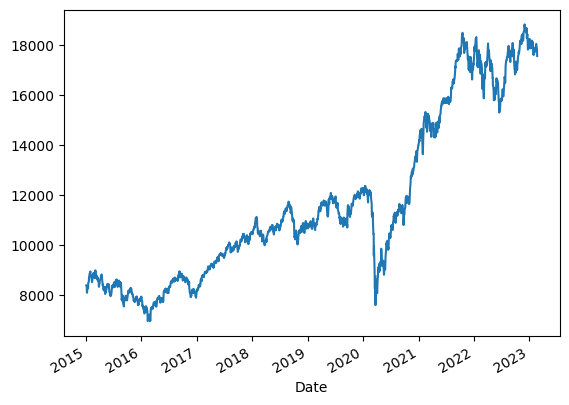

In [23]:
data.head()
data['Close'].plot()

XGBoost Regressor (r2_score = 98.79%)

In [6]:
import xgboost as xg

In [27]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

In [28]:
xgb_r.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [29]:
pred = xgb_r.predict(X_test)
pred = pd.DataFrame(data=pred)
pred

,0
0,11586.398438
1,8728.197266
2,8280.728516
3,16731.318359
4,8280.728516
...,...
597,8269.774414
598,17276.730469
599,11227.550781
600,10442.985352


In [30]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, pred)
print("R-squared : % f" %(r2))

R-squared :  0.987934


K-Nearest Neighbours (r2_score = 94.03%)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [25]:
pred = knn.predict(X_test)
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, pred)
print("R-squared : % f" %(r2))


R-squared :  0.940321


In [15]:
# plt.plot(y_test, label='Actual Price')
# plt.plot(pred, label='Predicted Price')
# plt.title('Actual vs Predicted Stock Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()